# Plot 1xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins, for one phih bin(-Pi to Pi), so there are lots of PhT bins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf


In [2]:

def Get_weighted_average(value,error):
    Factor=(0.3894*1e6)
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/((Factor)**2*error[i]**2)
        sum_sigma += 1/(Factor**2*error[i]**2)
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)

In [3]:

#for pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_lowQ2_Pt_lumi3_He3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.148401,0.460127,0.323600,1.395059,0.025838,FUUT,0.030659,0.000307,0.0,0.0,He3,pi+,solid,0.000307
1,1,11.0,0.144967,0.469019,0.323519,1.384619,0.047115,FUUT,0.030367,0.000300,0.0,0.0,He3,pi+,solid,0.000300
2,2,11.0,0.142071,0.476625,0.323531,1.375988,0.060577,FUUT,0.030084,0.000303,0.0,0.0,He3,pi+,solid,0.000303
3,3,11.0,0.139508,0.483251,0.323386,1.367870,0.070407,FUUT,0.029900,0.000323,0.0,0.0,He3,pi+,solid,0.000323
4,4,11.0,0.137442,0.488711,0.323293,1.361541,0.078490,FUUT,0.029715,0.000312,0.0,0.0,He3,pi+,solid,0.000312


In [4]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


   i  Ebeam         x         y         z        Q2        pT   obs     value   
0  0   11.0  0.148401  0.460127  0.323600  1.395059  0.025838  FUUT  0.030659  \
1  1   11.0  0.144967  0.469019  0.323519  1.384619  0.047115  FUUT  0.030367   
2  2   11.0  0.142071  0.476625  0.323531  1.375988  0.060577  FUUT  0.030084   
3  3   11.0  0.139508  0.483251  0.323386  1.367870  0.070407  FUUT  0.029900   
4  4   11.0  0.137442  0.488711  0.323293  1.361541  0.078490  FUUT  0.029715   

       stat  systrel  systabs target hadron Experiment     error  
0  0.000307      0.0      0.0    He3    pi+      solid  0.000307  
1  0.000300      0.0      0.0    He3    pi+      solid  0.000300  
2  0.000303      0.0      0.0    He3    pi+      solid  0.000303  
3  0.000323      0.0      0.0    He3    pi+      solid  0.000323  
4  0.000312      0.0      0.0    He3    pi+      solid  0.000312  
313
249
190
150
120
95


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

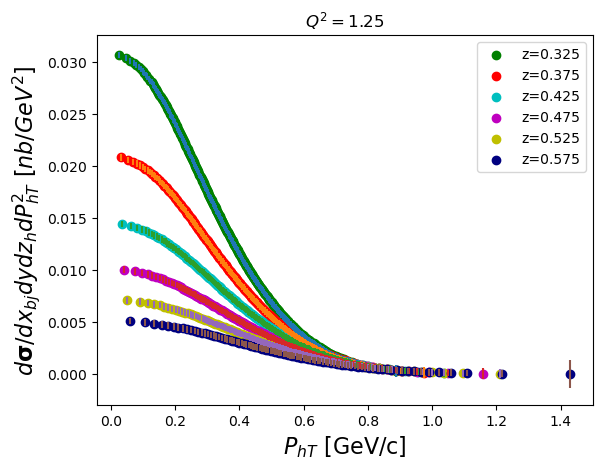

In [5]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
print(df_3xs_z.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


14
14
14
14
14
14


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

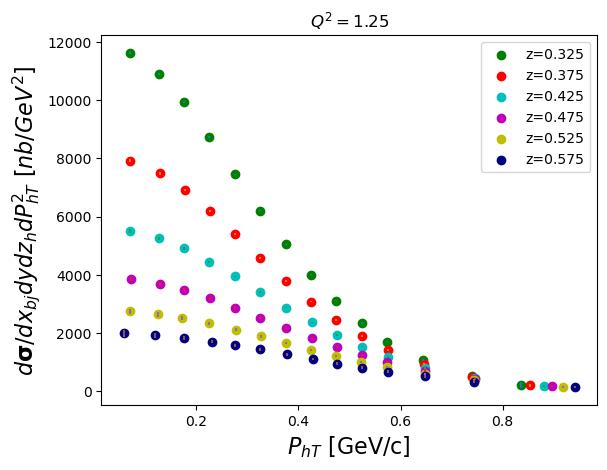

In [6]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

   i  Ebeam         x         y         z        Q2        pT   obs     value   
0  0   11.0  0.148401  0.460127  0.323600  1.395059  0.025838  FUUT  0.030659  \
1  1   11.0  0.144967  0.469019  0.323519  1.384619  0.047115  FUUT  0.030367   
2  2   11.0  0.142071  0.476625  0.323531  1.375988  0.060577  FUUT  0.030084   
3  3   11.0  0.139508  0.483251  0.323386  1.367870  0.070407  FUUT  0.029900   
4  4   11.0  0.137442  0.488711  0.323293  1.361541  0.078490  FUUT  0.029715   

       stat  systrel  systabs target hadron Experiment     error  
0  0.000307      0.0      0.0    He3    pi+      solid  0.000307  
1  0.000300      0.0      0.0    He3    pi+      solid  0.000300  
2  0.000303      0.0      0.0    He3    pi+      solid  0.000303  
3  0.000323      0.0      0.0    He3    pi+      solid  0.000323  
4  0.000312      0.0      0.0    He3    pi+      solid  0.000312  
         i  Ebeam         x         y         z        Q2        pT   obs   
1251  1251   11.0  0.194119  0.438

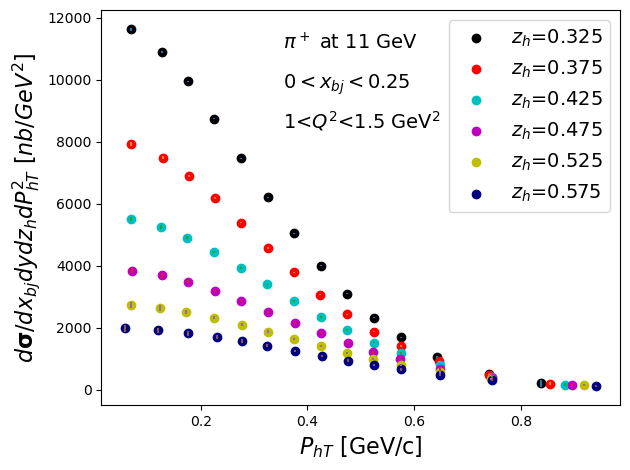

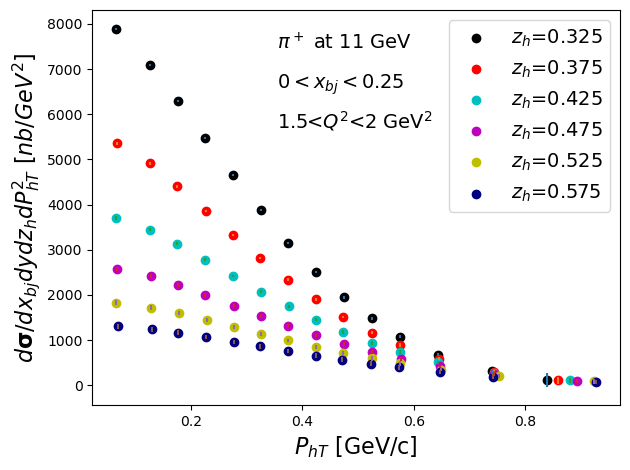

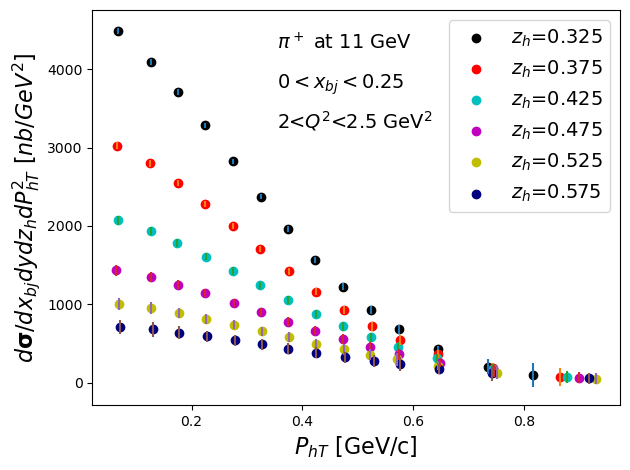

In [7]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_11_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','k','r','c','m','y','navy','purple']
    print(df_3xs_z.head())
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend=r'$z_h$='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend(fontsize=14)
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.35,.7,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes,fontsize=14)
    plt.text(.35,.8,rf'${xbj_cuts[0]}<x_{{bj}}<{xbj_cuts[1]}$',transform=plt.gca().transAxes,fontsize=14)
    plt.text(.35,.9,'$\pi^+$ at 11 GeV',transform=plt.gca().transAxes,fontsize=14)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.tight_layout()
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pip.pdf')
file.close()

         i  Ebeam         x         y         z        Q2        pT   obs   
3360  3360   11.0  0.228346  0.573212  0.323489  2.693942  0.027995  FUUT  \
3361  3361   11.0  0.227192  0.576033  0.323469  2.690971  0.051730  FUUT   
3362  3362   11.0  0.226221  0.578311  0.323553  2.688427  0.067230  FUUT   
3363  3363   11.0  0.225239  0.580811  0.323441  2.687299  0.080225  FUUT   
3364  3364   11.0  0.224481  0.582627  0.323536  2.685904  0.091726  FUUT   

         value      stat  systrel  systabs target hadron Experiment     error  
3360  0.007442  0.000409      0.0      0.0    He3    pi+      solid  0.000409  
3361  0.007368  0.000405      0.0      0.0    He3    pi+      solid  0.000405  
3362  0.007291  0.000416      0.0      0.0    He3    pi+      solid  0.000416  
3363  0.007216  0.000398      0.0      0.0    He3    pi+      solid  0.000398  
3364  0.007132  0.000412      0.0      0.0    He3    pi+      solid  0.000412  
8
8
8


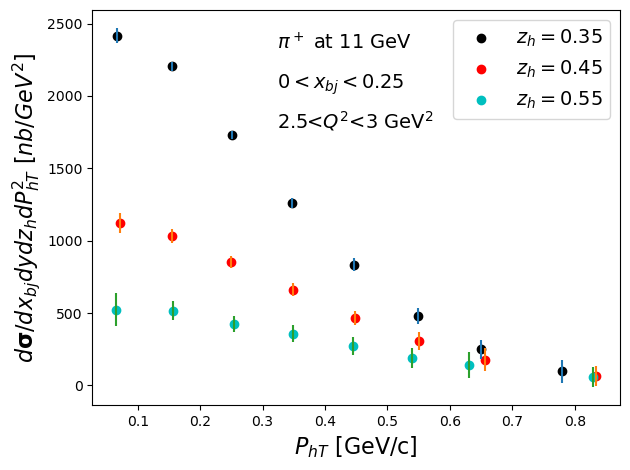

In [8]:
#plot for the Q2 bins
i_Q2=4
z_cuts=[0.3,0.4,0.5,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.6]
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_11_Q22.5-3_He3.txt','w')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
print(df_3xs_z.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','k','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))

        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend=r'$z_h=$'+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend(fontsize=14)
#
#plt.yscale('log')
#plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.text(.35,.7,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes,fontsize=14)
plt.text(.35,.8,rf'${xbj_cuts[0]}<x_{{bj}}<{xbj_cuts[1]}$',transform=plt.gca().transAxes,fontsize=14)
plt.text(.35,.9,'$\pi^+$ at 11 GeV',transform=plt.gca().transAxes,fontsize=14)
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.tight_layout()
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pip.pdf')
file.close()

In [9]:
#for pip, lowQ2, x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1,1.5,2,2.5,3]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

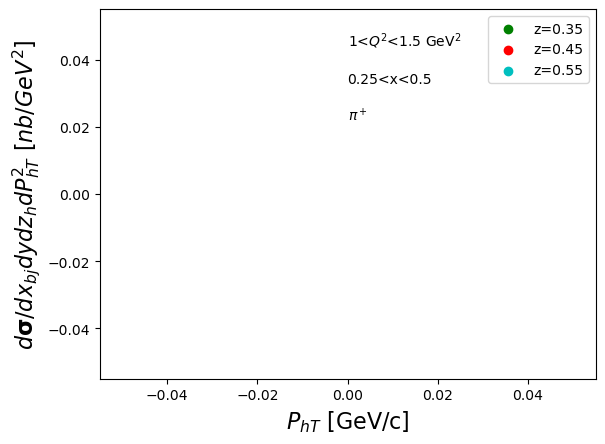

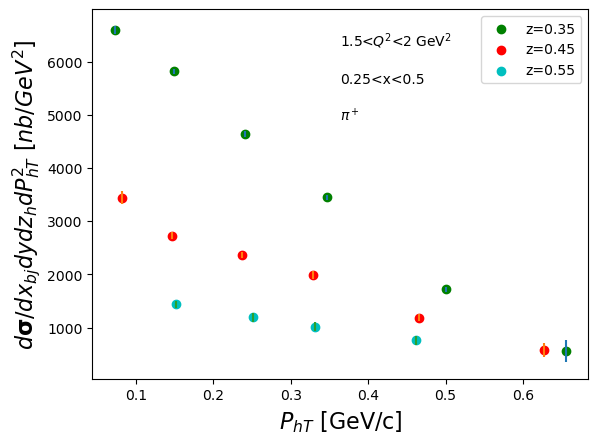

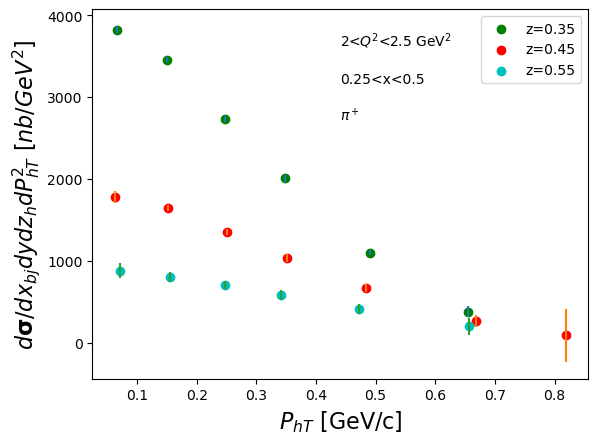

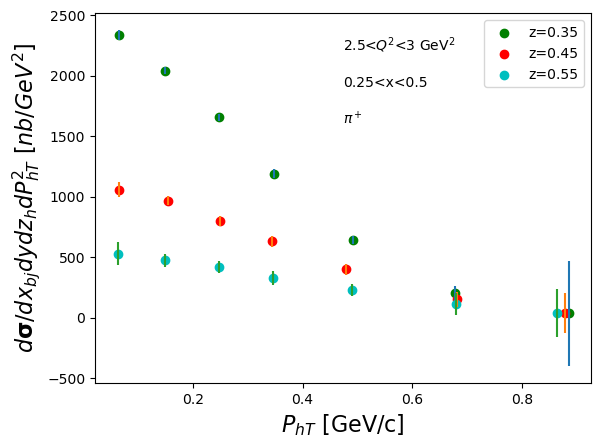

In [10]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pip_11_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_11_pip.pdf')
file.close()

In [11]:

#for high Q2 pip
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_highQ2_Pt_lumi3_He3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.319154,0.520537,0.323184,3.394296,0.017623,FUUT,0.004044,0.000444,0.0,0.0,He3,pi+,solid,0.000444
1,1,11.0,0.320529,0.518796,0.323264,3.395767,0.032397,FUUT,0.004011,0.000444,0.0,0.0,He3,pi+,solid,0.000444
2,2,11.0,0.321296,0.517458,0.323346,3.393145,0.042183,FUUT,0.003992,0.000442,0.0,0.0,He3,pi+,solid,0.000442
3,3,11.0,0.322349,0.516166,0.323357,3.393765,0.050239,FUUT,0.003965,0.000438,0.0,0.0,He3,pi+,solid,0.000438
4,4,11.0,0.323179,0.514946,0.323350,3.392486,0.057152,FUUT,0.003946,0.000448,0.0,0.0,He3,pi+,solid,0.000448


In [12]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,5,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


302
187
113


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

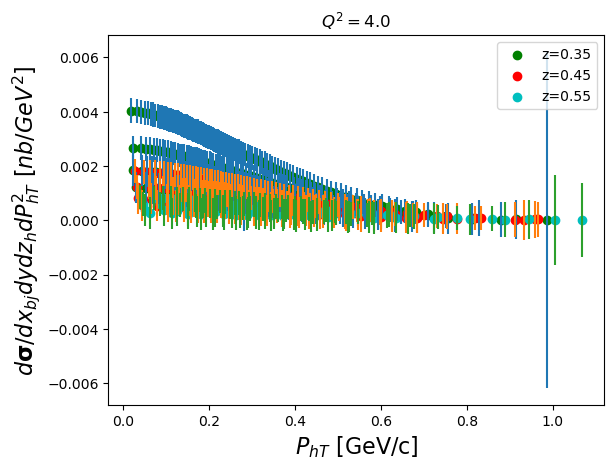

In [13]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


df length after pt cut 34
df length after pt cut 36
df length after pt cut 39
df length after pt cut 35
df length after pt cut 33
df length after pt cut 26
df length after pt cut 21
df length after pt cut 18
df length after pt cut 14
df length after pt cut 12
df length after pt cut 9
df length after pt cut 25
12
df length after pt cut 15
df length after pt cut 19
df length after pt cut 21
df length after pt cut 22
df length after pt cut 20
df length after pt cut 18
df length after pt cut 15
df length after pt cut 13
df length after pt cut 9
df length after pt cut 9
df length after pt cut 8
df length after pt cut 18
12
df length after pt cut 8
df length after pt cut 8
df length after pt cut 11
df length after pt cut 13
df length after pt cut 12
df length after pt cut 11
df length after pt cut 11
df length after pt cut 7
df length after pt cut 8
df length after pt cut 5
df length after pt cut 4
df length after pt cut 15
12


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\\phi_h}$ [$nb/GeV^2$]')

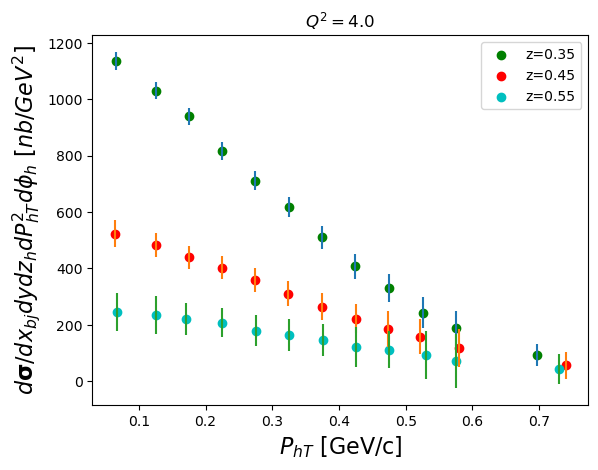

In [14]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        print('df length after pt cut',len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

3.141592653589793
Q2 l 3
z l  0.3
df length after pt cut 163
df length after pt cut 163
df length after pt cut 75
df length after pt cut 39
4
z l  0.4
df length after pt cut 121
df length after pt cut 175
df length after pt cut 92
df length after pt cut 50
4


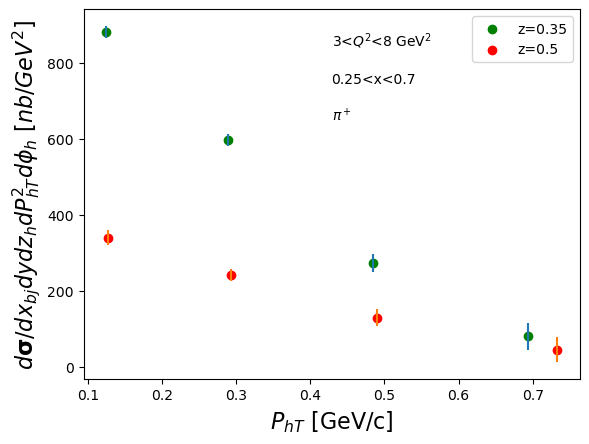

In [15]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.6,1.6]
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_hQ2_x2_pip_11_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    print('Q2 l',Q2_cuts[i_Q2-1])
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        print('z l ',z_cuts[i_z-1])
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            print('df length after pt cut',len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_hQ2_Pt_'+str(i_Q2)+'_11_pip.pdf')
file.close()

In [16]:
#For Pi-

In [17]:
#for pim

df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_lowQ2_Pt_lumi3_He3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.147607,0.462245,0.323492,1.393184,0.029500,FUUT,0.021523,0.000320,0.0,0.0,He3,pi-,solid,0.000320
1,1,11.0,0.143197,0.473697,0.323316,1.379766,0.053707,FUUT,0.021352,0.000306,0.0,0.0,He3,pi-,solid,0.000306
2,2,11.0,0.139443,0.483092,0.323206,1.367104,0.068569,FUUT,0.021243,0.000320,0.0,0.0,He3,pi-,solid,0.000320
3,3,11.0,0.136459,0.491237,0.323138,1.358430,0.079810,FUUT,0.021086,0.000316,0.0,0.0,He3,pi-,solid,0.000316
4,4,11.0,0.133843,0.498417,0.323072,1.350532,0.089354,FUUT,0.020945,0.000314,0.0,0.0,He3,pi-,solid,0.000314


In [18]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


237
180
135
104
80
62


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

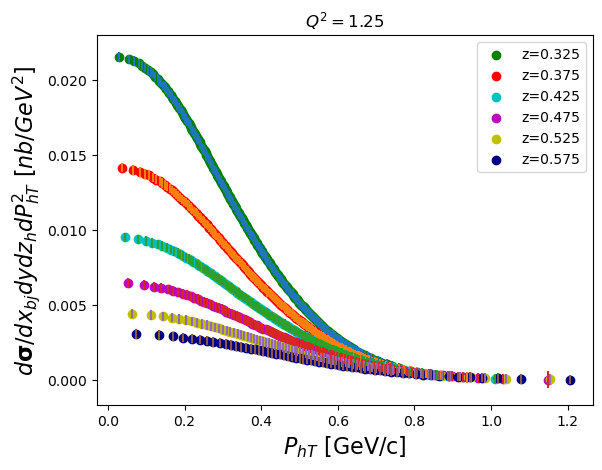

In [19]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


14
14
14
14
14
14


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

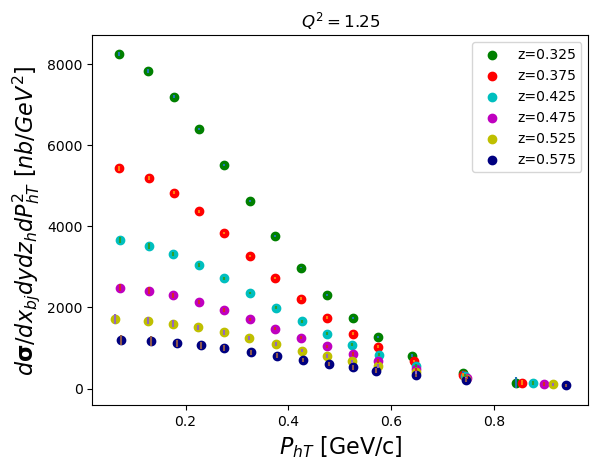

In [20]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

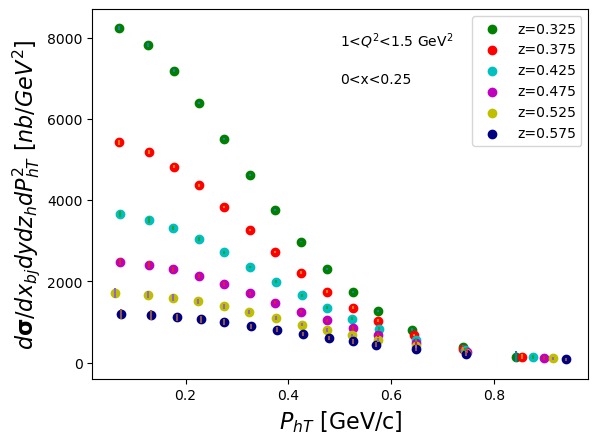

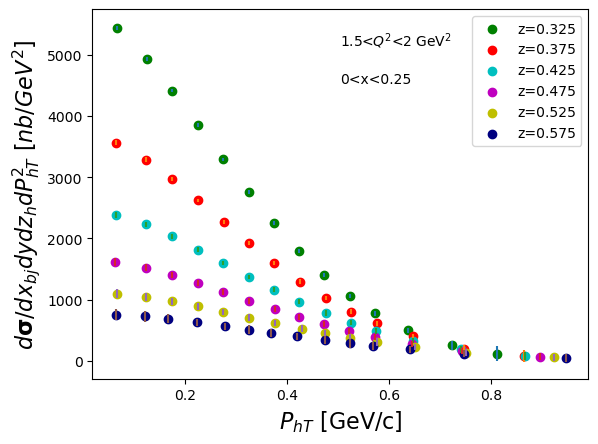

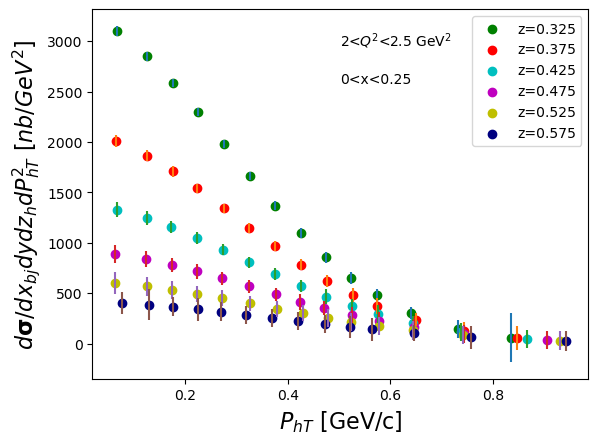

In [21]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_11_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pim.pdf')
file.close()

8
8
8


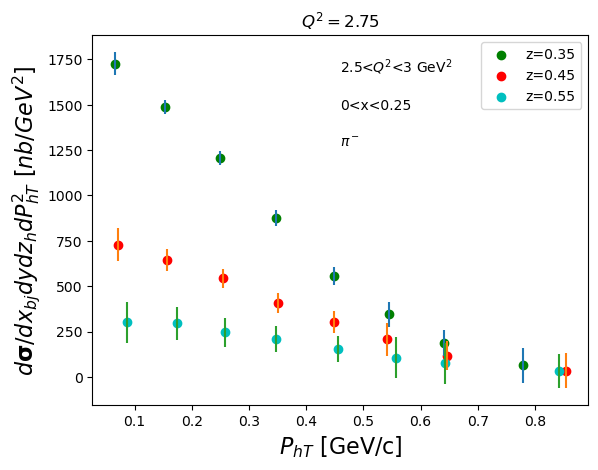

In [22]:
#plot for the Q2 bins
i_Q2=4
z_cuts=[0.3,0.4,0.5,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1.6]
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_11_Q22.5-3_He3.txt','w')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))

        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
plt.text(.5,.7,'$\pi^-$',transform=plt.gca().transAxes)
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_11_pim.pdf')
file.close()

In [23]:
#for pi- x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1,1.5,2,2.5,3]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]

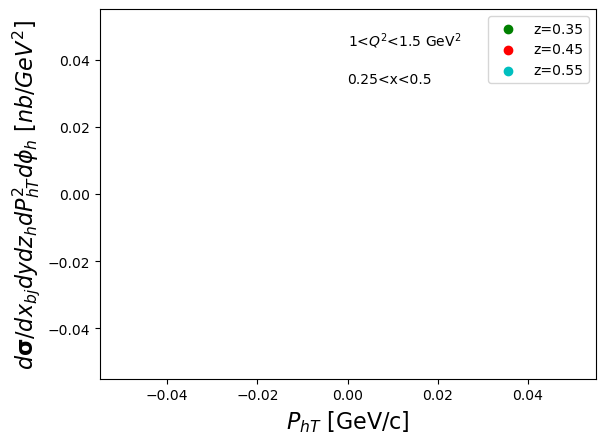

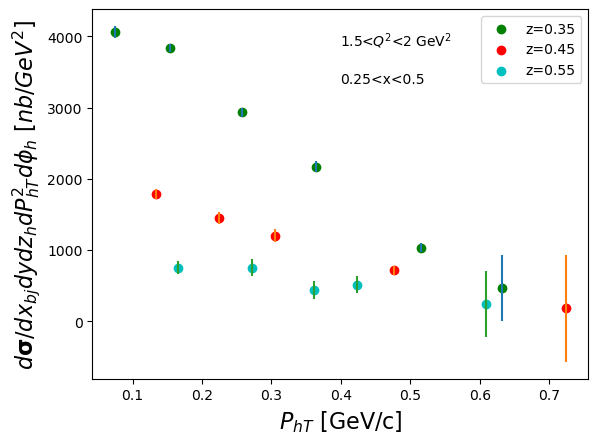

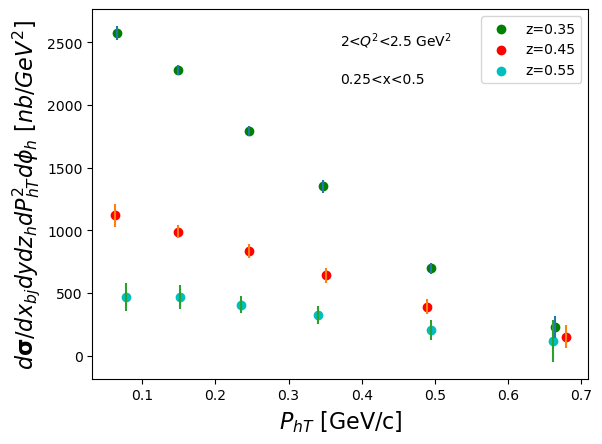

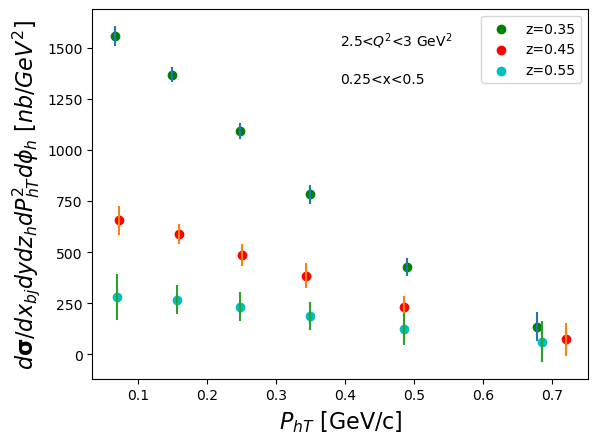

In [24]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pim_11_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_11_pim.pdf')
file.close()

In [25]:
#for pim

df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_highQ2_Pt_lumi3_He3.dat',delim_whitespace=True)
df_3xs_x1_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.319113,0.521015,0.323067,3.396554,0.021293,FUUT,0.002715,0.000447,0.0,0.0,He3,pi-,solid,0.000447
1,1,11.0,0.320702,0.518377,0.323072,3.393739,0.039333,FUUT,0.002695,0.000441,0.0,0.0,He3,pi-,solid,0.000441
2,2,11.0,0.321594,0.516897,0.323152,3.390807,0.051472,FUUT,0.002676,0.000438,0.0,0.0,He3,pi-,solid,0.000438
3,3,11.0,0.323254,0.515144,0.323147,3.393407,0.061354,FUUT,0.002644,0.000442,0.0,0.0,He3,pi-,solid,0.000442
4,4,11.0,0.324184,0.513730,0.323262,3.391335,0.069879,FUUT,0.002622,0.000446,0.0,0.0,He3,pi-,solid,0.000446


In [26]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,5,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


201
114
63


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\\phi_h}$ [$nb/GeV^2$]')

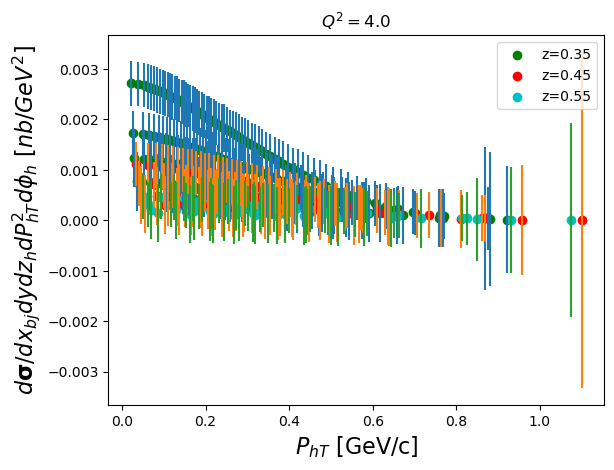

In [27]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)


df length after pt cut 23
df length after pt cut 24
df length after pt cut 25
df length after pt cut 25
df length after pt cut 19
df length after pt cut 18
df length after pt cut 15
df length after pt cut 11
df length after pt cut 8
df length after pt cut 9
df length after pt cut 6
df length after pt cut 18
12
df length after pt cut 9
df length after pt cut 11
df length after pt cut 14
df length after pt cut 12
df length after pt cut 13
df length after pt cut 10
df length after pt cut 9
df length after pt cut 9
df length after pt cut 6
df length after pt cut 4
df length after pt cut 4
df length after pt cut 13
12
df length after pt cut 5
df length after pt cut 4
df length after pt cut 6
df length after pt cut 7
df length after pt cut 6
df length after pt cut 6
df length after pt cut 6
df length after pt cut 6
df length after pt cut 3
df length after pt cut 2
df length after pt cut 3
df length after pt cut 9
12


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

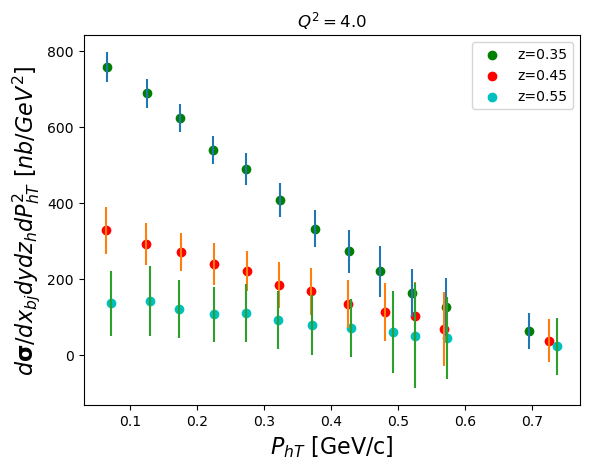

In [28]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        print('df length after pt cut',len(df_3xs_PhT))
        
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

3.141592653589793
Q2 l 3
z l  0.3
df length after pt cut 106
df length after pt cut 108
df length after pt cut 50
df length after pt cut 28
4
z l  0.4
df length after pt cut 71
df length after pt cut 99
df length after pt cut 55
df length after pt cut 32
4


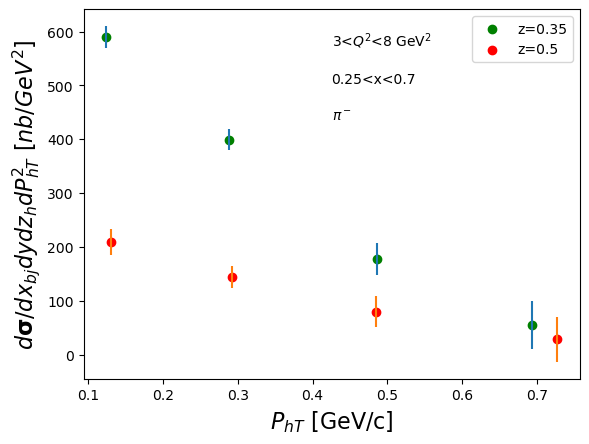

In [29]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[3,8]
xbj_cuts=[0.25,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.6,1.6]
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_hQ2_x2_pim_11_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    print('Q2 l',Q2_cuts[i_Q2-1])
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        print('z l ',z_cuts[i_z-1])
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            print('df length after pt cut',len(df_3xs_PhT))
        
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.text(.5,.7,'$\pi^-$',transform=plt.gca().transAxes)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_hQ2_Pt_'+str(i_Q2)+'_11_pim.pdf')
file.close()

In [30]:

#for pip 8.8
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_lowQ2_Pt_lumi3_He3.dat',delim_whitespace=True)


In [31]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,8]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()

3.141592653589793


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
3870,3870,8.8,0.170520,0.443273,0.323662,1.229626,0.015001,FUUT,0.031079,0.000321,0.0,0.0,He3,pi+,solid,0.000321
3871,3871,8.8,0.169731,0.446624,0.323530,1.231901,0.027939,FUUT,0.030789,0.000311,0.0,0.0,He3,pi+,solid,0.000311
3872,3872,8.8,0.168739,0.449584,0.323574,1.231390,0.036558,FUUT,0.030569,0.000319,0.0,0.0,He3,pi+,solid,0.000319
3873,3873,8.8,0.167966,0.452599,0.323701,1.232438,0.043467,FUUT,0.030273,0.000320,0.0,0.0,He3,pi+,solid,0.000320
3874,3874,8.8,0.167174,0.455116,0.323733,1.232340,0.049496,FUUT,0.030066,0.000320,0.0,0.0,He3,pi+,solid,0.000320


169
142
117
95
77
60


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

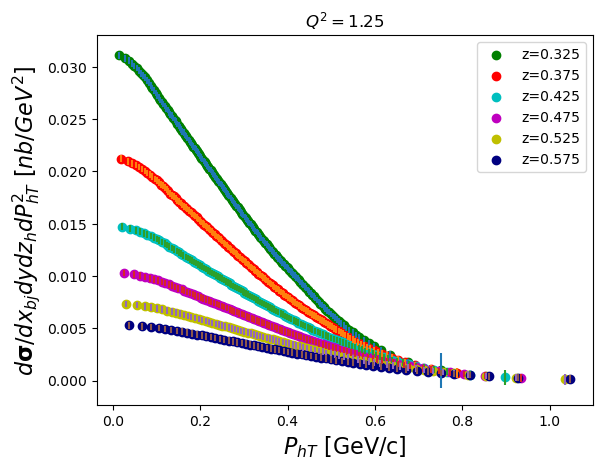

In [32]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


1
         i  Ebeam         x         y         z        Q2        pT   obs   
3870  3870    8.8  0.170520  0.443273  0.323662  1.229626  0.015001  FUUT  \
3871  3871    8.8  0.169731  0.446624  0.323530  1.231901  0.027939  FUUT   
3872  3872    8.8  0.168739  0.449584  0.323574  1.231390  0.036558  FUUT   
3873  3873    8.8  0.167966  0.452599  0.323701  1.232438  0.043467  FUUT   
3874  3874    8.8  0.167174  0.455116  0.323733  1.232340  0.049496  FUUT   

         value      stat  systrel  systabs target hadron Experiment     error  
3870  0.031079  0.000321      0.0      0.0    He3    pi+      solid  0.000321  
3871  0.030789  0.000311      0.0      0.0    He3    pi+      solid  0.000311  
3872  0.030569  0.000319      0.0      0.0    He3    pi+      solid  0.000319  
3873  0.030273  0.000320      0.0      0.0    He3    pi+      solid  0.000320  
3874  0.030066  0.000320      0.0      0.0    He3    pi+      solid  0.000320  
0.35
11
0.4
11
0.45
11
0.5
11
0.55
11
0.6
11


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

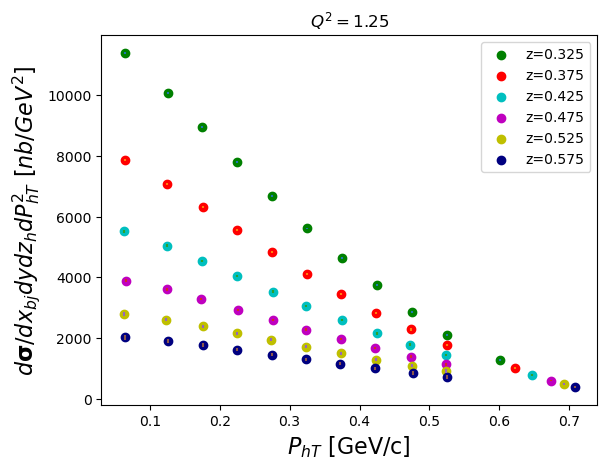

In [33]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
print(Q2_cuts[i_Q2-1])
print(df_3xs_z.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        #print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

1
Q2: 1 to 1.5
length for Q2 cut  737
         i  Ebeam         x         y         z        Q2        pT   obs   
3870  3870    8.8  0.170520  0.443273  0.323662  1.229626  0.015001  FUUT  \
3871  3871    8.8  0.169731  0.446624  0.323530  1.231901  0.027939  FUUT   
3872  3872    8.8  0.168739  0.449584  0.323574  1.231390  0.036558  FUUT   
3873  3873    8.8  0.167966  0.452599  0.323701  1.232438  0.043467  FUUT   
3874  3874    8.8  0.167174  0.455116  0.323733  1.232340  0.049496  FUUT   

         value      stat  systrel  systabs target hadron Experiment     error  
3870  0.031079  0.000321      0.0      0.0    He3    pi+      solid  0.000321  
3871  0.030789  0.000311      0.0      0.0    He3    pi+      solid  0.000311  
3872  0.030569  0.000319      0.0      0.0    He3    pi+      solid  0.000319  
3873  0.030273  0.000320      0.0      0.0    He3    pi+      solid  0.000320  
3874  0.030066  0.000320      0.0      0.0    He3    pi+      solid  0.000320  
1
Q2: 1 to 1.5
0.35

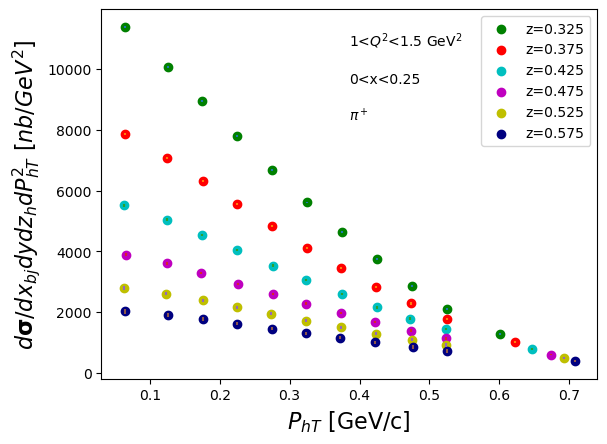

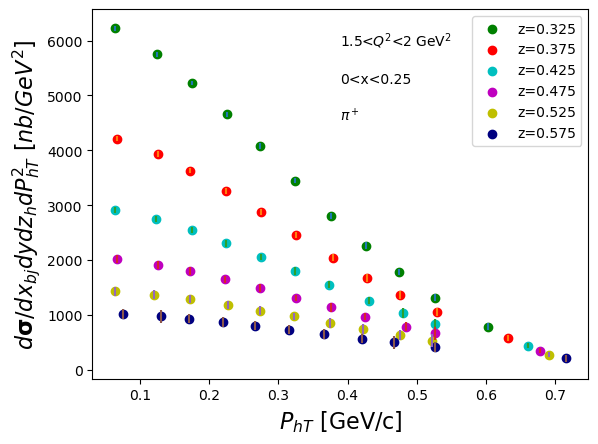

In [34]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_8p8_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
for i_Q2 in range(1,len(Q2_cuts)-2):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    print(i_Q2)
    print("Q2:",Q2_cuts[i_Q2-1],"to",Q2_cuts[i_Q2])
    print("length for Q2 cut ",len(df_3xs_z))
    print(df_3xs_z.head())
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    
    
        
    for i_z in range(1,len(z_cuts)):
        print(i_Q2)
        print("Q2:",Q2_cuts[i_Q2-1],"to",Q2_cuts[i_Q2])
        print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(df_3xs_PhT['stat'].tolist())
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_8p8_pip.pdf')
file.close()

2
         i  Ebeam         x         y         z        Q2        pT   obs   
4916  4916    8.8  0.230594  0.555226  0.323604  2.108761  0.043831  FUUT  \
4917  4917    8.8  0.230714  0.554986  0.323750  2.108938  0.082862  FUUT   
4918  4918    8.8  0.229082  0.559302  0.323862  2.110179  0.112011  FUUT   
4919  4919    8.8  0.227451  0.563039  0.324018  2.108686  0.139260  FUUT   
4920  4920    8.8  0.226751  0.564426  0.324253  2.106829  0.168297  FUUT   

         value      stat  systrel  systabs target hadron Experiment     error  
4916  0.010079  0.000410      0.0      0.0    He3    pi+      solid  0.000410  
4917  0.009789  0.000407      0.0      0.0    He3    pi+      solid  0.000407  
4918  0.009441  0.000419      0.0      0.0    He3    pi+      solid  0.000419  
4919  0.009070  0.000415      0.0      0.0    He3    pi+      solid  0.000415  
4920  0.008618  0.000407      0.0      0.0    He3    pi+      solid  0.000407  
0.4
8
0.6
8


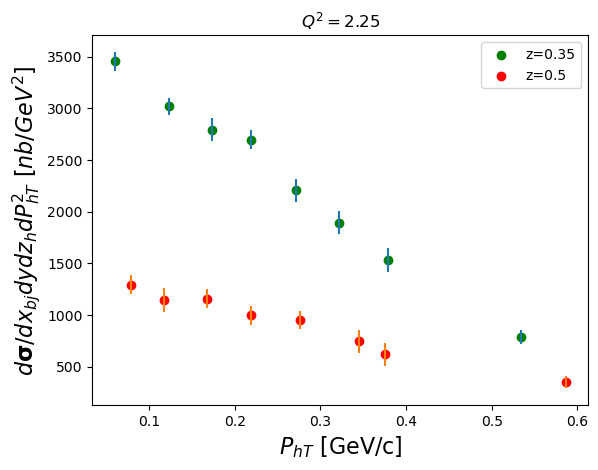

In [35]:
#For pip, lowQ2 2-2.5, x1
i_Q2=3
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,1.6]
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pip_8p8_Q22-2.5_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
print(Q2_cuts[i_Q2-1])
print(df_3xs_z.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        #print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_8p8_pip.pdf')
file.close()

In [36]:
#for pip, lowQ2, x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1.5,2,2.5,3]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2.head()


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
4670,4670,8.8,0.266509,0.412987,0.323381,1.815695,0.055983,FUUT,0.014958,0.000317,0.0,0.0,He3,pi+,solid,0.000317
4671,4671,8.8,0.268254,0.408383,0.323657,1.807330,0.105036,FUUT,0.014445,0.000316,0.0,0.0,He3,pi+,solid,0.000316
4672,4672,8.8,0.269097,0.406888,0.324672,1.806418,0.143258,FUUT,0.013604,0.000317,0.0,0.0,He3,pi+,solid,0.000317
4673,4673,8.8,0.268859,0.407894,0.324361,1.809167,0.186824,FUUT,0.012527,0.000318,0.0,0.0,He3,pi+,solid,0.000318
4674,4674,8.8,0.268742,0.408159,0.324305,1.809531,0.236635,FUUT,0.011122,0.000323,0.0,0.0,He3,pi+,solid,0.000323


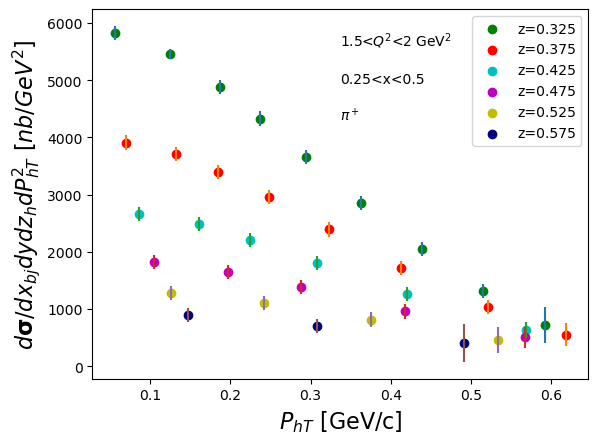

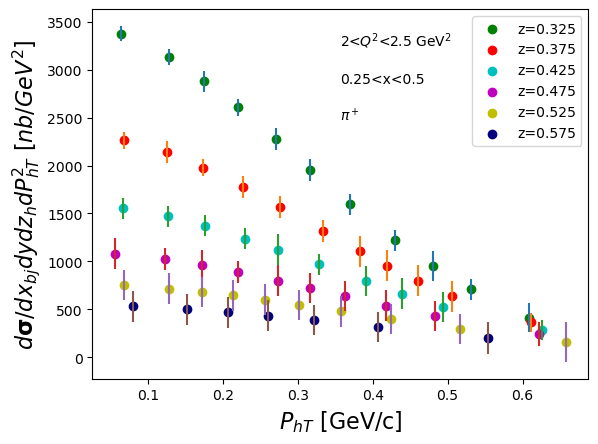

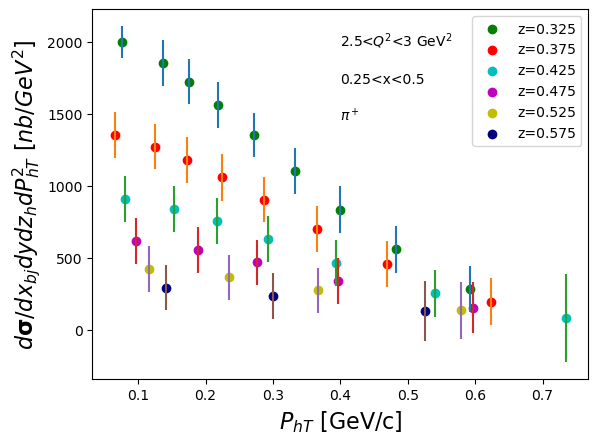

In [37]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pip_8p8_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^+$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_8p8_pip.pdf')
file.close()

In [38]:

#for pim 8.8
df_3xs_x1_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_lowQ2_Pt_lumi3_He3.dat',delim_whitespace=True)


In [39]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,8]
xbj_cuts=[0,0.25]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2.head()

3.141592653589793


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
2589,2589,8.8,0.169681,0.445762,0.323403,1.230182,0.018616,FUUT,0.021178,0.000313,0.0,0.0,He3,pi-,solid,0.000313
2590,2590,8.8,0.168561,0.449889,0.323388,1.231354,0.034275,FUUT,0.020948,0.000317,0.0,0.0,He3,pi-,solid,0.000317
2591,2591,8.8,0.167310,0.454320,0.323468,1.232107,0.044488,FUUT,0.020709,0.000320,0.0,0.0,He3,pi-,solid,0.000320
2592,2592,8.8,0.166298,0.458227,0.323454,1.233047,0.053083,FUUT,0.020490,0.000312,0.0,0.0,He3,pi-,solid,0.000312
2593,2593,8.8,0.165090,0.462543,0.323593,1.233345,0.060974,FUUT,0.020246,0.000307,0.0,0.0,He3,pi-,solid,0.000307


121
98
79
63
49
37


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

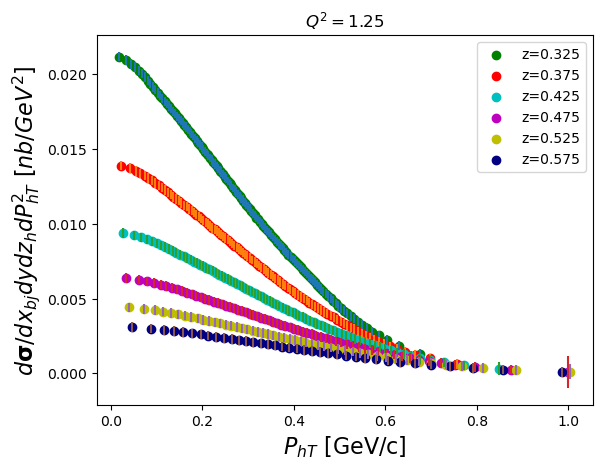

In [40]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


0.35
11
0.4
11
0.45
11
0.5
11
0.55
11
0.6
11


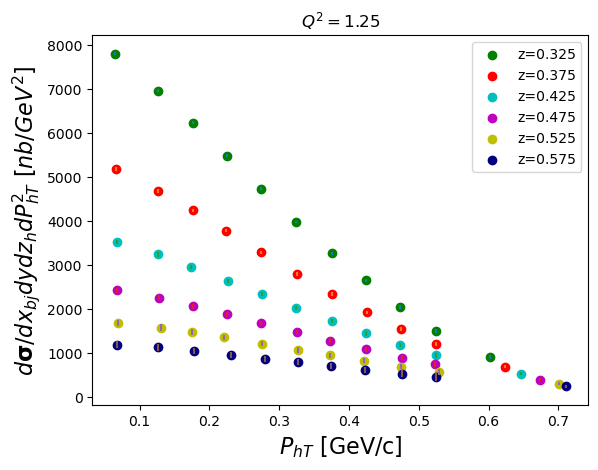

In [41]:
#plot for the Q2 bins
i_Q2=1
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_8p8_Q21-1.5_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        #print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'8p8_pim.pdf')
file.close()

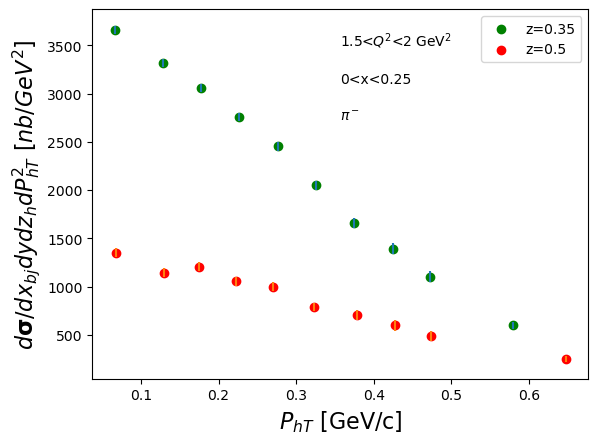

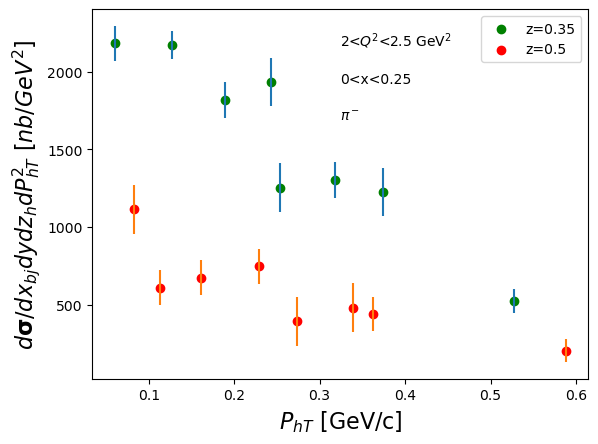

In [42]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x1_pim_8p8_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
for i_Q2 in range(2,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']
    if i_Q2==2:
        #z_cuts=[0.3,0.4,0.6]
        PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,1.6]
    if i_Q2==3:
        
        PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,1.6]
    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(df_3xs_PhT['stat'].tolist())
            _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
            _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _sys = _Fuu*0.1
            _target=df_3xs_PhT['target'].tolist()[0]
            _hadron=df_3xs_PhT['hadron'].tolist()[0]
            file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
            #print(_pT)
            Fuus.append(_Fuu)
            Fuu_stats.append(_Fuu_stat)
            pTs.append(_pT)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^-$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_'+str(i_Q2)+'_8p8_pim.pdf')
file.close()

In [43]:
#for pip, lowQ2, x2
xbj_cuts=[0.25,0.5]
Q2_cuts=[1.5,2,2.5,3,8]
df_3xs_zQ2=df_3xs_x1_zQ2xbjPhT[(df_3xs_x1_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
PhT_cuts=[0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,1.6]
df_3xs_zQ2.head()


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
3126,3126,8.8,0.267028,0.411533,0.323200,1.812850,0.070000,FUUT,0.009895,0.000314,0.0,0.0,He3,pi-,solid,0.000314
3127,3127,8.8,0.268893,0.407326,0.324272,1.806972,0.134887,FUUT,0.009162,0.000318,0.0,0.0,He3,pi-,solid,0.000318
3128,3128,8.8,0.268612,0.407968,0.324244,1.807893,0.201762,FUUT,0.008063,0.000315,0.0,0.0,He3,pi-,solid,0.000315
3129,3129,8.8,0.268529,0.408073,0.324142,1.807789,0.285953,FUUT,0.006404,0.000314,0.0,0.0,He3,pi-,solid,0.000314
3130,3130,8.8,0.268359,0.407509,0.323677,1.804195,0.387638,FUUT,0.004390,0.000319,0.0,0.0,He3,pi-,solid,0.000319


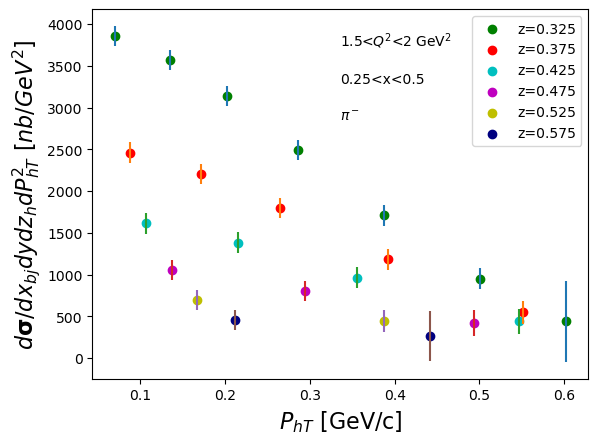

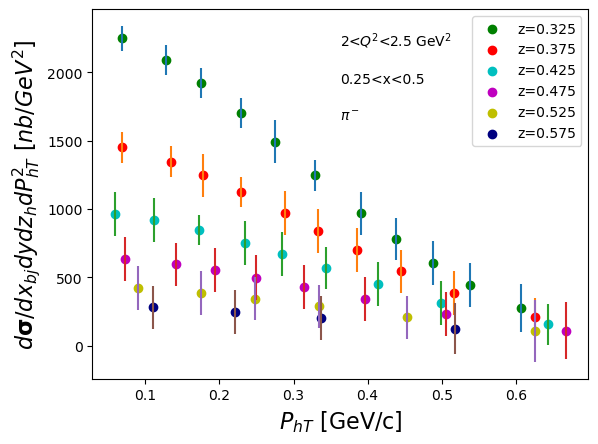

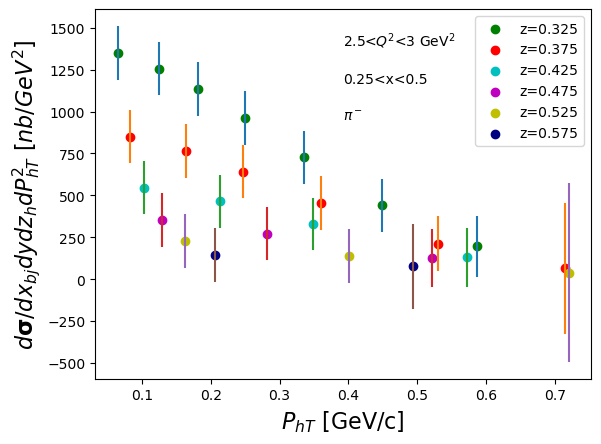

In [44]:
#plot for the Q2 bins
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pim_8p8_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
i_counts=0
for i_Q2 in range(1,len(Q2_cuts)-1):
    plt.figure()
    df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
    #factor_zs=[10,9,8,7,6,5,4,3,2,1]
    color=['b','g','r','c','m','y','navy','purple']

    for i_z in range(1,len(z_cuts)):
        #print(z_cuts[i_z])
        df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
        #print(len(df_3xs))
        Fuus=[]
        Fuu_stats=[]
        pTs=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
            #print(len(df_3xs_PhT))
            if len(df_3xs_PhT)>0:
                
                _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
                _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _sys = _Fuu*0.1
                _target=df_3xs_PhT['target'].tolist()[0]
                _hadron=df_3xs_PhT['hadron'].tolist()[0]
                file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
                #print(_pT)
                Fuus.append(_Fuu)
                Fuu_stats.append(_Fuu_stat)
                pTs.append(_pT)
                i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
        #print(len(pTs))
        plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
        #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
        #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
    plt.legend()
    #plt.yscale('log')
    #plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
    plt.text(.5,.9,f'{Q2_cuts[i_Q2-1]}<$Q^2$<{Q2_cuts[i_Q2]} GeV$^2$',transform=plt.gca().transAxes)
    plt.text(.5,.8,f'{xbj_cuts[0]}<x<{xbj_cuts[1]}',transform=plt.gca().transAxes)
    plt.text(.5,.7,'$\pi^-$',transform=plt.gca().transAxes)
    plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
    plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
    plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_x2_'+str(i_Q2)+'_8p8_pim.pdf')
file.close()

In [45]:
#for pim 8.8 hQ2
df_3xs_x2_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpim_highQ2_Pt_lumi3_He3.dat',delim_whitespace=True)

df_3xs_x2_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.319113,0.521015,0.323067,3.396554,0.021293,FUUT,0.002715,0.000447,0.0,0.0,He3,pi-,solid,0.000447
1,1,11.0,0.320702,0.518377,0.323072,3.393739,0.039333,FUUT,0.002695,0.000441,0.0,0.0,He3,pi-,solid,0.000441
2,2,11.0,0.321594,0.516897,0.323152,3.390807,0.051472,FUUT,0.002676,0.000438,0.0,0.0,He3,pi-,solid,0.000438
3,3,11.0,0.323254,0.515144,0.323147,3.393407,0.061354,FUUT,0.002644,0.000442,0.0,0.0,He3,pi-,solid,0.000442
4,4,11.0,0.324184,0.513730,0.323262,3.391335,0.069879,FUUT,0.002622,0.000446,0.0,0.0,He3,pi-,solid,0.000446


In [46]:
xbj_cuts=[0.25,0.7]
Q2_cuts=[3,8]
df_3xs_zQ2=df_3xs_x2_zQ2xbjPhT[(df_3xs_x2_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x2_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x2_zQ2xbjPhT['x']<xbj_cuts[1])]
print(len(df_3xs_zQ2))
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,1.6]
df_3xs_zQ2.head()

52


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
590,590,8.8,0.372205,0.557622,0.323156,3.417231,0.051265,FUUT,0.001773,0.000444,0.0,0.0,He3,pi-,solid,0.000444
591,591,8.8,0.374011,0.555629,0.323418,3.419269,0.100125,FUUT,0.001685,0.000442,0.0,0.0,He3,pi-,solid,0.000442
592,592,8.8,0.378770,0.551476,0.323727,3.436566,0.140260,FUUT,0.001553,0.000440,0.0,0.0,He3,pi-,solid,0.000440
593,593,8.8,0.380664,0.549752,0.323999,3.442014,0.181875,FUUT,0.001423,0.000450,0.0,0.0,He3,pi-,solid,0.000450
594,594,8.8,0.379209,0.551100,0.323916,3.437486,0.229290,FUUT,0.001285,0.000445,0.0,0.0,He3,pi-,solid,0.000445


28
21


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

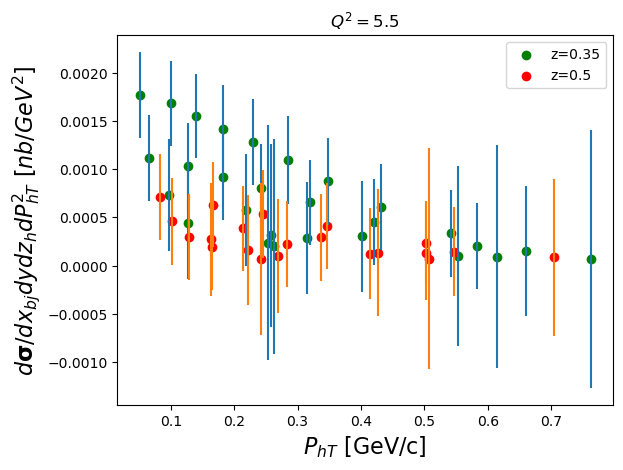

In [47]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


0.4
28
[0.000444, 0.000446, 0.00058]
[0.000442, 0.00044, 0.00045, 0.000451, 0.000447, 0.000579]
[0.000445, 0.000454, 0.00045, 0.00058, 0.000954, 0.001116, 0.001219]
[0.000451, 0.000442, 0.000579]
[0.000446, 0.000445, 0.000576]
[0.000448, 0.000674, 0.000443, 0.001337, 0.00116, 0.000934]
6
0.6
21
[0.000445]
[0.000444, 0.000449, 0.000449, 0.000447, 0.000585]
[0.000452, 0.000445, 0.000448, 0.000575, 0.000593, 0.000787]
[0.000446, 0.000449]
[0.000472, 0.00066]
[0.000446, 0.000812, 0.00046, 0.000486, 0.001148]
6


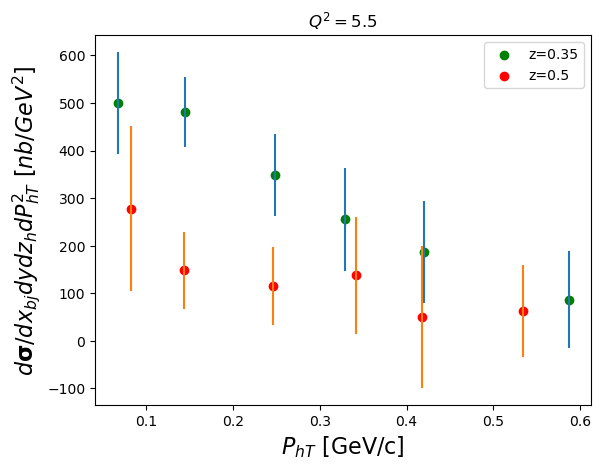

In [48]:
#plot for the Q2 bins
i_Q2=1
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pim_8p8_hQ2_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_hQ2_8p8_pim.pdf')
file.close()

In [49]:
#for pip 8.8 hQ2
df_3xs_x2_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_highQ2_Pt_lumi3_He3.dat',delim_whitespace=True)

df_3xs_x2_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.319154,0.520537,0.323184,3.394296,0.017623,FUUT,0.004044,0.000444,0.0,0.0,He3,pi+,solid,0.000444
1,1,11.0,0.320529,0.518796,0.323264,3.395767,0.032397,FUUT,0.004011,0.000444,0.0,0.0,He3,pi+,solid,0.000444
2,2,11.0,0.321296,0.517458,0.323346,3.393145,0.042183,FUUT,0.003992,0.000442,0.0,0.0,He3,pi+,solid,0.000442
3,3,11.0,0.322349,0.516166,0.323357,3.393765,0.050239,FUUT,0.003965,0.000438,0.0,0.0,He3,pi+,solid,0.000438
4,4,11.0,0.323179,0.514946,0.323350,3.392486,0.057152,FUUT,0.003946,0.000448,0.0,0.0,He3,pi+,solid,0.000448


In [50]:
xbj_cuts=[0.25,0.7]
Q2_cuts=[3,8]
df_3xs_zQ2=df_3xs_x2_zQ2xbjPhT[(df_3xs_x2_zQ2xbjPhT['Ebeam']==8.8)&(df_3xs_x2_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x2_zQ2xbjPhT['x']<xbj_cuts[1])]
print(len(df_3xs_zQ2))
z_cuts=[0.3,0.4,0.6]
PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5,1.6]
df_3xs_zQ2.head()

83


,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
962,962,8.8,0.372572,0.557309,0.323328,3.419426,0.041460,FUUT,0.002681,0.000445,0.0,0.0,He3,pi+,solid,0.000445
963,963,8.8,0.372723,0.556947,0.323441,3.416255,0.078724,FUUT,0.002614,0.000448,0.0,0.0,He3,pi+,solid,0.000448
964,964,8.8,0.375035,0.554791,0.323775,3.423281,0.106398,FUUT,0.002506,0.000447,0.0,0.0,He3,pi+,solid,0.000447
965,965,8.8,0.378377,0.551743,0.323942,3.434833,0.132499,FUUT,0.002378,0.000446,0.0,0.0,He3,pi+,solid,0.000446
966,966,8.8,0.380829,0.549764,0.324198,3.444090,0.158513,FUUT,0.002245,0.000455,0.0,0.0,He3,pi+,solid,0.000455


40
38


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

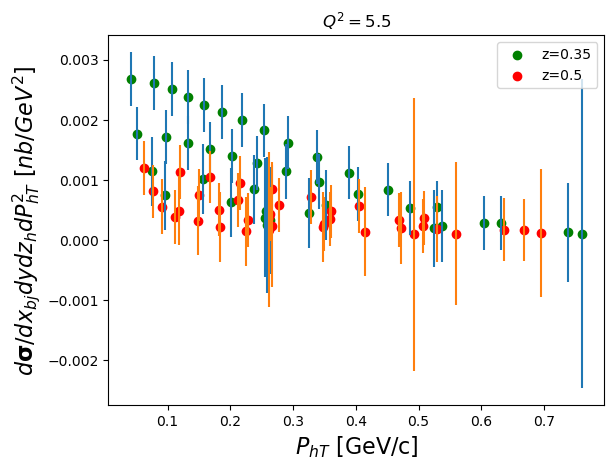

In [51]:
#plot for the Q2 bins
i_Q2=1

df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus=df_3xs['value'].to_list()
    Fuu_stats=df_3xs['stat'].to_list()
    pTs=df_3xs['pT'].to_list()
    
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)


0.4
40
[0.000445, 0.000448, 0.000445, 0.000449, 0.00058, 0.000578]
[0.000447, 0.000446, 0.000455, 0.000446, 0.000453, 0.00045, 0.000584]
[0.000445, 0.000446, 0.00044, 0.000448, 0.000449, 0.000458, 0.000574, 0.000769, 0.000581, 0.000888, 0.00099, 0.001131]
[0.000443, 0.000445, 0.000456, 0.000582, 0.000582]
[0.000444, 0.000447, 0.000449]
[0.000438, 0.000446, 0.002571, 0.000451, 0.000824, 0.000599, 0.000642]
6
0.6
38
[0.000448, 0.000443, 0.000453]
[0.00045, 0.000435, 0.00044, 0.000444, 0.000446, 0.00058, 0.000578, 0.000576]
[0.000446, 0.000447, 0.000446, 0.000444, 0.000445, 0.000451, 0.000575, 0.001013, 0.000577, 0.001284]
[0.000449, 0.000447, 0.000451, 0.000448, 0.000581]
[0.00045, 0.000448, 0.0006, 0.000742, 0.002268]
[0.00045, 0.000517, 0.000525, 0.000448, 0.001061, 0.000552, 0.001189]
6


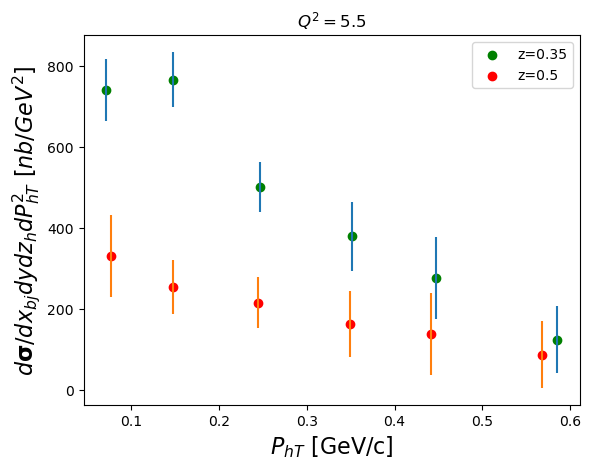

In [52]:
#plot for the Q2 bins
i_Q2=1
file=open('Materials/results_June2024/onephi_Sep/numbers_x2_pip_8p8_hQ2_He3.txt','w')
file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z=df_3xs_zQ2[(df_3xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    print(z_cuts[i_z])
    df_3xs=df_3xs_z[(df_3xs_z['z']>z_cuts[i_z-1])&(df_3xs_z['z']<z_cuts[i_z])]
    print(len(df_3xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT=df_3xs[(df_3xs['pT']>PhT_cuts[i_PhT-1])&(df_3xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        print(df_3xs_PhT['stat'].tolist())
        _Fuu = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Fuu_stat = Get_weighted_average(df_3xs_PhT['value'].tolist(),df_3xs_PhT['stat'].tolist())[1]
        _pT= Get_weighted_average_phi(df_3xs_PhT['pT'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _z=Get_weighted_average_phi(df_3xs_PhT['z'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _Q2=Get_weighted_average_phi(df_3xs_PhT['Q2'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _x=Get_weighted_average_phi(df_3xs_PhT['x'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y=Get_weighted_average_phi(df_3xs_PhT['y'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _sys = _Fuu*0.1
        _target=df_3xs_PhT['target'].tolist()[0]
        _hadron=df_3xs_PhT['hadron'].tolist()[0]
        file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs))
    plt.scatter(pTs,Fuus, color=color[i_z], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])
    
plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/FuuA_Pt_hQ2_8p8_pip.pdf')
file.close()